In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from psycopg2 import sql
import psycopg2
import os
import matplotlib.pyplot as plt

In [86]:
from model import update_price

update_price(update_db=False)

epsilon set to 0.75, which means we explore 75.0 % of the time
product rice, batch rice_6a7bceb6-ea81-47d7-8599-f8123d308cd3: explore. sampling uniformly between 1 and 6 eur. setting price to 1.2989707757160787
product rice, batch rice_e97cd306-6775-4761-a1ea-54b52560771b: explore. sampling uniformly between 1 and 6 eur. setting price to 2.700973511271
product rice, batch rice_849715db-37b9-4b5c-bafd-f1b923d67d89: explore. sampling uniformly between 1 and 6 eur. setting price to 5.469485186027169
product rice, batch rice_01966581-75db-47c1-beaa-ae11e7a053f8: explore. sampling uniformly between 1 and 6 eur. setting price to 2.376984739961027
product rice, batch rice_9f5a1344-78a5-46fb-89fd-6aad3006f735: explore. sampling uniformly between 1 and 6 eur. setting price to 1.7768082208221023
product rice, batch rice_d43cbd3b-20b7-4523-8931-638230e19281: explore. sampling uniformly between 1 and 6 eur. setting price to 1.279147188561124
product rice, batch rice_28451972-8fe8-4215-b2cf-6034c79

In [2]:
from model import load_data, preprocess_data

sales_data, price_data = load_data()
preprocessed_df = preprocess_data(sales_data, price_data)

<Axes: xlabel='timestamp'>

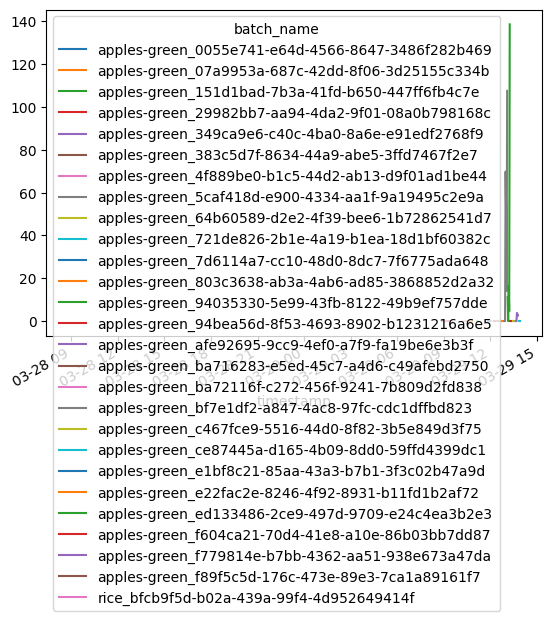

In [16]:
preprocessed_df.loc[lambda df: df.timestamp > '2024-03-28'].reset_index(drop=True).drop_duplicates('timestamp').pivot(index="timestamp", columns="batch_name", values="sales").plot()

In [90]:
preprocessed_df.plot(x='timestamp', y='sales', by)

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [84]:
epsilon=0.5

price_ranges = {
    'rice': (1, 6),
    'wine': (4, 25),
    'apples-red': (1.2, 4),
    'apples-green': (1.2, 4),
    'bananas': (0.9, 3),
    'bananas-organic': (1.5, 3.5),
    'broccoli': (2, 6),
    'cheese': (7, 25),
    'beef': (10, 30),
    'avocado': (4, 12)
}

print(f'epsilon set to {epsilon}, which means we explore {epsilon*100} % of the time')

unique_batch_names = sales_data.loc[lambda df: df.sell_by > pd.Timestamp.now()]['batch_name'].unique()

prices = []
for batch_name in unique_batch_names:
    product = sales_data.loc[lambda df: df['batch_name'] == batch_name]['product'].values[0]
    if np.random.rand() > epsilon:
        product_df = preprocessed_df.loc[lambda df: df['product'] == product]
        price = product_df.iloc[product_df['sales'].argmax()]['price']
        print(f'product {product}, batch {batch_name}: exploit. setting price to {price} '
              f'which generated the highest sales of {product_df['sales'].max()}')
    else:
        price = np.random.uniform(low=price_ranges[product][0], high=price_ranges[product][1])
        print(f'product {product}, batch {batch_name}: explore. sampling uniformly between '
            f'{price_ranges[product][0]} and {price_ranges[product][1]} eur. setting price to {price}')
    prices.append((product, batch_name, price))

prices_df = (
    pd.DataFrame(prices, columns=['product_name', 'batch_name', 'price'])
    .assign(start_date = pd.Timestamp.now())
    .sort_values(['product_name', 'batch_name', 'price'])
    .reset_index(drop=True)
)

prices_df


epsilon set to 0.5, which means we explore 50.0 % of the time
product rice, batch rice_6a7bceb6-ea81-47d7-8599-f8123d308cd3: exploit. setting price to 4.8459797 which generated the highest sales of 198.6851677
product rice, batch rice_e97cd306-6775-4761-a1ea-54b52560771b: explore. sampling uniformly between 1 and 6 eur. setting price to 3.335620647085011
product rice, batch rice_849715db-37b9-4b5c-bafd-f1b923d67d89: explore. sampling uniformly between 1 and 6 eur. setting price to 5.937091030845003
product rice, batch rice_01966581-75db-47c1-beaa-ae11e7a053f8: exploit. setting price to 4.8459797 which generated the highest sales of 198.6851677
product rice, batch rice_9f5a1344-78a5-46fb-89fd-6aad3006f735: explore. sampling uniformly between 1 and 6 eur. setting price to 1.5873266183856392
product rice, batch rice_d43cbd3b-20b7-4523-8931-638230e19281: explore. sampling uniformly between 1 and 6 eur. setting price to 3.2489449454156665
product rice, batch rice_28451972-8fe8-4215-b2cf-603

,product_name,batch_name,price,start_date
0,rice,rice_01966581-75db-47c1-beaa-ae11e7a053f8,4.845980,2024-03-29 14:46:20.640304
1,rice,rice_04c4ae06-240b-4198-b21f-c6756002be51,4.845980,2024-03-29 14:46:20.640304
2,rice,rice_07d476e6-10bf-4e24-8ddc-ea51c4a2cf7c,2.895987,2024-03-29 14:46:20.640304
3,rice,rice_0b5af15c-8045-4f55-a2f2-3589857a26c8,4.845980,2024-03-29 14:46:20.640304
4,rice,rice_0d5e0bd9-1949-448b-a47c-2c850fd779bd,4.845980,2024-03-29 14:46:20.640304
...,...,...,...,...
125,wine,wine_f4bc7e58-2910-433c-91d7-03a44001ae9d,24.712046,2024-03-29 14:46:20.640304
126,wine,wine_f7f43c93-5657-46a8-8beb-eabb778b4c12,6.146000,2024-03-29 14:46:20.640304
127,wine,wine_fa2e5c67-e215-440c-a05e-a7f0f4786729,24.712046,2024-03-29 14:46:20.640304
128,wine,wine_feceb5d6-e4d0-4689-ac9d-19197b46d768,7.316213,2024-03-29 14:46:20.640304
